In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42

In [73]:
wt = pd.read_csv('wt-long.csv')
wt_ext = wt.iloc[:,0:3]
wt_ext['ratio'] = wt[' AverageBrightness(Seg)_C1'].values/wt[' AverageBrightness(Seg)_C0'].values

dCCP = pd.read_csv('dCCP-long.csv')
dCCP_ext = dCCP.iloc[:,0:3]
dCCP_ext['ratio'] = dCCP[' AverageBrightness(Seg)_C1'].values/dCCP[' AverageBrightness(Seg)_C0'].values
wt_ext

CellID   LinkID   ImgNo     ratio
0          1      NaN       4  2.011076
1          1      NaN       5  1.993494
2          1      NaN       6  1.802526
3          1      NaN       7  1.569593
4          1      NaN       8  1.508770
...      ...      ...     ...       ...
1544      21      NaN      89  1.643310
1545      21      NaN      90  1.683603
1546      21      NaN      91  1.674066
1547      21      NaN      92  1.589969
1548      21      NaN      93  1.666542

[1549 rows x 4 columns]

In [78]:
wt_pivot = wt_ext.pivot(index= ' ImgNo', columns="CellID", values="ratio")
for i in range(21):
    tmp = wt_pivot[i+1].dropna().values
    tmp = np.hstack([tmp, np.full(len(wt_pivot.index)-tmp.shape[0],np.nan)])
    wt_pivot[i+1] = tmp
wt_pivot['time'] = np.arange(-10,170,2)

dCCP_pivot = dCCP_ext.pivot(index= ' ImgNo', columns="CellID", values="ratio")
for i in range(20):
    tmp = dCCP_pivot[i+1].dropna().values
    tmp = np.hstack([tmp, np.full(len(dCCP_pivot.index)-tmp.shape[0],np.nan)])
    dCCP_pivot[i+1] = tmp
dCCP_pivot['time'] = np.arange(-10,173,2)

#wt_pivot = wt_pivot.dropna(how='any')
#dCCP_pivot = dCCP_pivot.dropna(how='any')

wt_pivot

CellID         1         2         3         4         5         6         7  \
 ImgNo                                                                         
4       2.011076  1.795749  1.938051  1.953138  1.925789  1.895998  1.923946   
5       1.993494  1.574229  1.656986  1.923542  1.689385  1.662973  1.783928   
6       1.802526  1.492846  1.570472  1.656663  1.528711  1.523170  1.569885   
7       1.569593  1.476317  1.513802  1.546356  1.488333  1.502674  1.480222   
8       1.508770  1.476644  1.494982  1.501058  1.454538  1.474434  1.602125   
...          ...       ...       ...       ...       ...       ...       ...   
89      1.468762  1.622262  1.478481  1.927997       NaN       NaN       NaN   
90      1.510201  1.577194  1.481851  1.947316       NaN       NaN       NaN   
91      1.549116  1.598164  1.469176       NaN       NaN       NaN       NaN   
92      1.538017  1.567788  1.470750       NaN       NaN       NaN       NaN   
93      1.568924  1.571527  1.503908       NaN       NaN       NaN       NaN   

CellID         8         9        10  ...        13        14        15  \
 ImgNo                                ...                                 
4       2.010893  1.949600  1.993560  ...  1.937863  1.935336  1.961763   
5       1.934194  1.939982  1.801808  ...  1.778461  1.968715  1.965183   
6       1.693818  1.747025  1.591723  ...  1.627951  1.826278  1.780298   
7       1.551019  1.530648  1.519244  ...  1.505836  1.621996  1.589282   
8       1.495714  1.482906  1.499031  ...  1.484411  1.539803  1.517490   
...          ...       ...       ...  ...       ...       ...       ...   
89           NaN       NaN       NaN  ...       NaN       NaN       NaN   
90           NaN       NaN       NaN  ...       NaN       NaN       NaN   
91           NaN       NaN       NaN  ...       NaN       NaN       NaN   
92           NaN       NaN       NaN  ...       NaN       NaN       NaN   
93           NaN       NaN       NaN  ...       NaN       NaN       NaN   

CellID        16        17        18        19        20        21  time  
 ImgNo                                                                    
4       2.066907  2.079121  1.982286  1.991518  2.039396  2.012422   -10  
5       2.055059  1.962269  1.772553  2.039484  2.023274  1.977799    -8  
6       1.873366  1.681502  1.588647  1.976707  1.914484  1.717252    -6  
7       1.599433  1.531020  1.505962  1.710795  1.693572  1.601251    -4  
8       1.550333  1.502568  1.510574  1.536668  1.587941  1.544988    -2  
...          ...       ...       ...       ...       ...       ...   ...  
89           NaN       NaN       NaN       NaN       NaN       NaN   160  
90           NaN       NaN       NaN       NaN       NaN       NaN   162  
91           NaN       NaN       NaN       NaN       NaN       NaN   164  
92           NaN       NaN       NaN       NaN       NaN       NaN   166  
93           NaN       NaN       NaN       NaN       NaN       NaN   168  

[90 rows x 22 columns]

In [82]:
#wt_melt = wt_pivot.iloc[:70,:].melt( id_vars= "time")
#dCCP_melt = dCCP_pivot.iloc[:70,:].melt( id_vars= "time")

wt_melt = wt_pivot.melt( id_vars= "time")
dCCP_melt = dCCP_pivot.melt( id_vars= "time")

wt_melt

time CellID     value
0      -10      1  2.011076
1       -8      1  1.993494
2       -6      1  1.802526
3       -4      1  1.569593
4       -2      1  1.508770
...    ...    ...       ...
1885   160     21       NaN
1886   162     21       NaN
1887   164     21       NaN
1888   166     21       NaN
1889   168     21       NaN

[1890 rows x 3 columns]

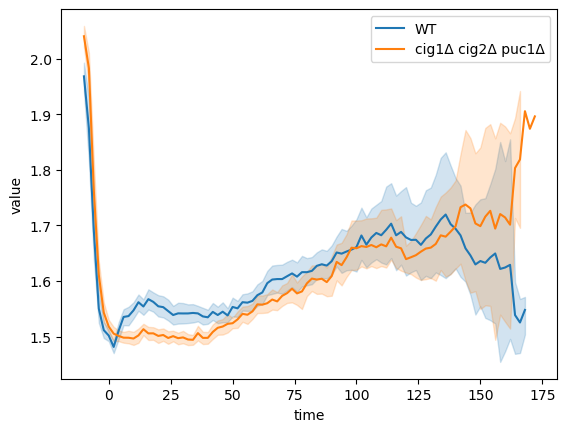

In [83]:
sns.lineplot(data=wt_melt, x='time',y='value', label='WT')
sns.lineplot(data=dCCP_melt, x='time',y='value', label='cig1Δ cig2Δ puc1Δ')
plt.savefig('dCCP.pdf')
plt.show()

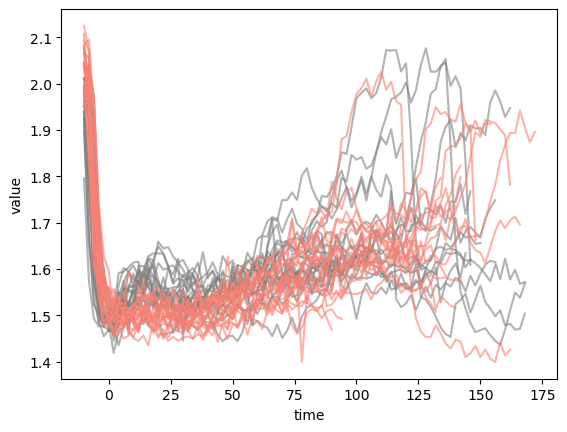

In [110]:
sns.lineplot(data=wt_melt, x='time',y='value', legend=False, estimator=None, units="CellID", color='gray',alpha=0.6)
sns.lineplot(data=dCCP_melt, x='time',y='value', legend=False, estimator=None, units="CellID",color='salmon',alpha=0.6)
plt.show()

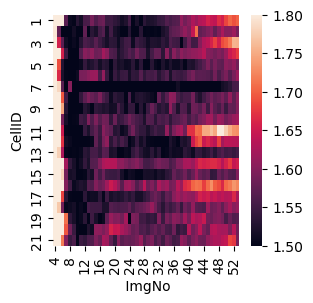

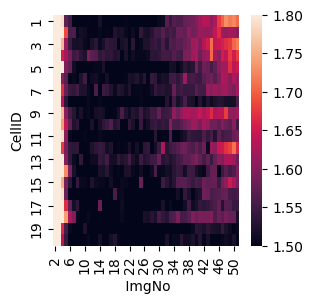

(21, 50)

(20, 50)

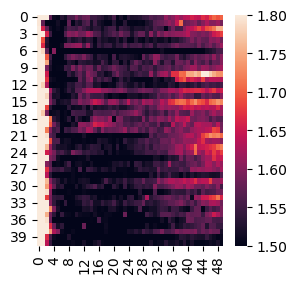

In [107]:
plt.figure(figsize=(3,3))
sns.heatmap(wt_pivot.iloc[0:50,:-1].T, vmax=1.8, vmin=1.5)
plt.show()
plt.figure(figsize=(3,3))
sns.heatmap(dCCP_pivot.iloc[0:50,:-1].T, vmax=1.8, vmin=1.5)
plt.show()


display(wt_pivot.iloc[:50,:-1].T.values.shape)
display(dCCP_pivot.iloc[:50,:-1].T.values.shape)

plt.figure(figsize=(3,3))
sns.heatmap(np.hstack([wt_pivot.iloc[:50,:-1].values, dCCP_pivot.iloc[:50,:-1].values]).T, vmax=1.8, vmin=1.5)
plt.show()
